#### Objetivo da análise
Tentar prever a nota (pontos) que o vinho recebe, a partir da descrição


In [38]:
import pandas
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
pandas.set_option('display.max_colwidth', -1)
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 7)
pandas.set_option('display.max_colwidth', -1)

In [16]:
dataset = pandas.read_csv('winemag-data_first150k.csv')

In [17]:
dataset.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,"Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.",Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named after the highest point in the vineyard at 1200 feet. It has structure, density and considerable acidity that is still calming down. With 18 months in wood, the wine has developing an extra richness and concentration. Produced by the Tari family, formerly of Château Giscours in Margaux, it is a wine made for aging. Drink from 2020.",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


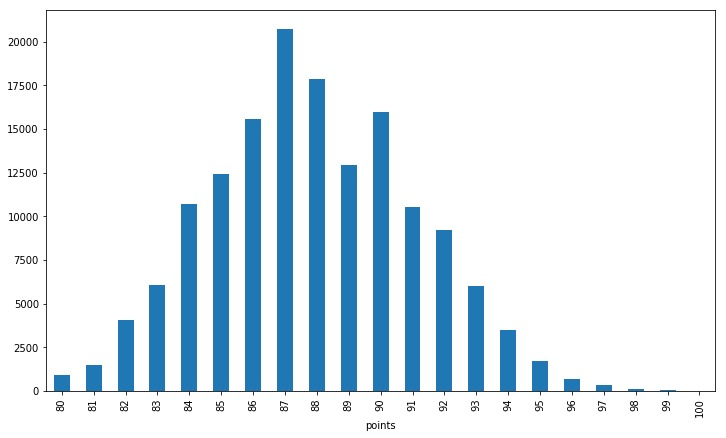

In [41]:
dataset.groupby('points')['description'].count().plot.bar()

## Vetorizando Dados

In [23]:
vectorizer = TfidfVectorizer(token_pattern='(?u)\\b\\w\\w+\\b', norm='l2', lowercase=True, use_idf=True, max_features=1700)
model_vectorizer = vectorizer.fit(dataset.description.values)
features = model_vectorizer.transform(dataset.description.values)
features.shape

(150930, 1700)

## Treino e teste

In [40]:
x_train, x_test, y_train, y_test = train_test_split(features, dataset.points.values, test_size=0.2, random_state=42)

classifier = LogisticRegression(n_jobs=1, class_weight='balanced', solver='lbfgs', max_iter=30, multi_class='ovr')
model = classifier.fit(x_train, y_train)

predicted = model.predict(x_test)

In [32]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

          80       0.24      0.39      0.30       155
          81       0.20      0.31      0.24       312
          82       0.27      0.37      0.31       828
          83       0.23      0.32      0.27      1204
          84       0.28      0.30      0.29      2122
          85       0.25      0.24      0.25      2482
          86       0.28      0.24      0.26      3190
          87       0.31      0.24      0.27      4147
          88       0.27      0.22      0.24      3541
          89       0.21      0.22      0.22      2568
          90       0.29      0.22      0.25      3122
          91       0.23      0.23      0.23      2088
          92       0.25      0.28      0.26      1861
          93       0.21      0.28      0.24      1235
          94       0.19      0.33      0.24       721
          95       0.18      0.30      0.23       357
          96       0.21      0.32      0.26       145
          97       0.21    

In [36]:
accuracy_score(y_test, predicted)

0.25435632412376596